# Reproducing "Deep Bayesian Active Learning with Image Data"

Imports

In [ ]:
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

Constants

In [ ]:
T = 20
NUM_CLASSES = 10
EPOCHS = 50
INIT_TRAIN_SIZE = 20
VALID_SIZE = 100
BATCH_SIZE = 128
POOL_BATCH_SIZE = 128
SUBPOOL_SIZE = 10_000
ACQ_SIZE = 10
ACQ_STEPS = 100
REPS = 3
WDS = [
    0.5e-2, 1e-2,
    0.5e-3, 1e-3,
    0.5e-4, 1e-4,
    0.5e-5, 1e-5,
    0.5e-6, 1e-6
]
NUM_WORKERS = 2


Plot

In [ ]:
# data: list of {"data": [], "label": str, "color": str}
def plot_graph(data, std=False):
  x = [i*ACQ_SIZE for i in range(ACQ_STEPS+1)]

  for line in data:
    y = np.mean(line["data"], axis=0)
    plt.plot(x,y, label=line["label"], color=line["color"])
    if std:
      y_std = np.std(line["data"], axis=0)
      plt.fill_between(x, y - y_std, y + y_std, color=line["color"], alpha=0.2)

  plt.ylim(50.0, 75.0)

  plt.xticks(np.arange(0, 1100, 100))
  # plt.yticks(np.arange(80.0, 102.0, 2.0))

  plt.legend(loc='lower right')
  plt.grid(linestyle='--')
  plt.show()

def print_table(data):
  x = [i*ACQ_SIZE for i in range(ACQ_STEPS+1)]
  hdrs = ["% err"]
  ten_row = ["10%"]
  five_row = ["5%"]

  for line in data:
    y = np.mean(line["data"], axis=0)
    i_ten = next(i for i, x in enumerate(y) if x >= 90.0)
    i_five = next(i for i, x in enumerate(y) if x >= 95.0)

    interp_ten = (90.0 - y[i_ten-1]) / (y[i_ten] - y[i_ten-1])
    res_ten = i_ten*ACQ_SIZE + round(interp_ten*ACQ_SIZE)

    interp_five = (95.0 - y[i_five-1]) / (y[i_five] - y[i_five-1])
    res_five = i_five*ACQ_SIZE + round(interp_five*ACQ_SIZE)

    hdrs.append(line["label"])
    ten_row.append(res_ten)
    five_row.append(res_five)

  print(tabulate([ten_row, five_row], headers=hdrs))



b_data =  [[39.03, 43.51, 48.45, 49.2, 53.5, 54.51, 53.4, 55.4, 54.93, 58.85, 61.05, 55.71, 61.92, 64.32, 61.98, 65.44, 65.08, 64.28, 65.95, 64.48, 65.39, 67.9, 67.23, 65.82, 62.82, 68.22, 66.77, 68.6, 67.14, 67.44, 68.39, 69.67, 69.06, 69.97, 68.96, 70.47, 70.41, 69.65, 69.75, 70.29, 70.39, 70.71, 70.73, 70.68, 70.92, 70.33, 69.81, 69.98, 71.03, 71.17, 70.01, 70.48, 71.18, 70.04, 70.78, 70.81, 70.68, 70.51, 70.76, 70.98, 70.57, 70.93, 70.65, 70.82, 70.93, 69.52, 71.18, 70.97, 71.73, 71.68, 71.48, 71.08, 71.5, 71.15, 71.73, 70.39, 70.61, 70.99, 70.51, 71.51, 71.79, 70.95, 71.42, 71.41, 71.31, 71.5, 71.31, 70.76, 71.41, 71.77, 70.75, 71.45, 70.93, 71.26, 70.49, 71.4, 71.25, 71.18, 71.6, 71.52, 71.71], [43.05, 46.27, 49.09, 49.97, 52.09, 52.76, 54.32, 54.86, 56.2, 59.86, 57.0, 61.08, 61.0, 63.61, 66.5, 64.76, 64.99, 66.61, 65.95, 67.16, 66.25, 66.26, 66.73, 66.85, 66.96, 69.05, 66.68, 68.45, 68.58, 69.64, 69.44, 68.87, 69.19, 69.25, 68.76, 69.19, 69.34, 69.91, 69.21, 69.65, 70.26, 69.6, 69.85, 70.74, 69.9, 69.85, 70.56, 70.73, 70.74, 70.67, 69.22, 70.5, 70.69, 71.51, 70.6, 71.63, 72.03, 71.5, 70.4, 70.8, 71.7, 70.93, 71.36, 70.76, 71.08, 71.21, 70.72, 71.13, 71.06, 71.47, 70.69, 71.76, 71.76, 72.11, 71.16, 71.51, 71.52, 71.66, 71.19, 71.32, 72.1, 71.52, 70.9, 71.95, 71.82, 71.58, 71.76, 71.08, 71.35, 70.86, 71.35, 71.68, 71.56, 71.53, 71.25, 72.34, 71.21, 71.51, 72.48, 70.52, 71.62], [37.72, 43.36, 50.72, 56.49, 54.93, 57.4, 54.59, 58.96, 63.45, 64.7, 62.78, 59.86, 62.75, 65.23, 66.64, 65.9, 65.68, 68.08, 67.83, 66.4, 67.84, 68.14, 68.44, 68.37, 66.99, 68.89, 68.6, 70.05, 68.54, 68.81, 69.74, 68.95, 69.41, 69.56, 69.19, 69.6, 69.93, 69.76, 69.68, 69.68, 71.06, 69.7, 70.34, 70.14, 69.98, 70.77, 70.49, 70.58, 69.87, 69.69, 70.09, 69.84, 70.42, 70.66, 70.93, 71.05, 71.16, 70.73, 71.04, 70.56, 71.18, 70.44, 71.52, 70.93, 70.56, 71.31, 71.62, 70.9, 70.64, 70.1, 71.38, 70.22, 70.77, 71.74, 71.76, 71.25, 71.26, 71.7, 71.05, 71.25, 71.05, 71.98, 70.13, 72.07, 71.2, 71.08, 71.59, 72.24, 70.83, 70.83, 71.44, 70.59, 70.65, 72.05, 72.12, 71.28, 71.72, 71.77, 71.83, 71.89, 71.45]]
vr_data = [[42.8, 42.4, 48.27, 53.46, 59.29, 60.11, 61.1, 59.26, 61.17, 61.54, 62.39, 59.77, 63.13, 63.55, 66.26, 66.13, 66.31, 66.99, 66.89, 67.65, 66.92, 66.09, 66.43, 67.09, 67.29, 67.13, 66.78, 68.43, 66.75, 68.33, 68.21, 68.43, 68.13, 66.97, 67.55, 69.78, 68.67, 68.88, 69.63, 68.48, 69.54, 68.63, 69.07, 68.25, 68.52, 68.77, 69.12, 68.66, 68.8, 68.9, 68.92, 69.5, 69.12, 69.82, 70.29, 68.83, 70.05, 70.09, 70.54, 70.16, 69.88, 69.87, 71.3, 69.37, 70.4, 69.72, 70.2, 69.42, 70.27, 70.24, 69.9, 71.17, 70.15, 70.18, 71.66, 70.37, 71.18, 70.21, 70.57, 70.36, 70.65, 70.1, 69.12, 70.57, 70.29, 70.43, 70.83, 70.34, 70.52, 70.89, 71.19, 70.7, 70.0, 70.37, 70.69, 71.41, 71.27, 70.98, 71.54, 70.88, 71.87], [41.67, 45.28, 48.02, 51.67, 53.97, 56.37, 59.55, 60.55, 60.79, 62.43, 61.37, 61.06, 63.19, 63.99, 63.43, 64.9, 65.35, 64.12, 65.51, 65.44, 64.5, 65.0, 65.25, 66.31, 65.5, 66.92, 66.33, 66.57, 67.55, 67.2, 66.51, 67.25, 67.65, 67.56, 66.58, 67.47, 67.57, 67.51, 67.54, 68.32, 68.29, 67.55, 69.12, 68.57, 69.76, 68.36, 69.61, 68.72, 68.91, 68.89, 68.57, 69.62, 69.64, 69.14, 68.71, 69.02, 69.05, 69.14, 69.87, 69.91, 69.82, 69.28, 69.4, 69.6, 69.53, 69.76, 69.7, 70.09, 69.94, 69.99, 69.68, 70.53, 70.34, 69.69, 70.33, 69.76, 70.04, 69.88, 69.64, 69.66, 69.02, 70.86, 69.67, 69.58, 69.75, 70.02, 70.01, 70.94, 69.62, 70.67, 70.42, 71.49, 70.48, 70.47, 70.58, 70.83, 70.41, 69.92, 71.06, 70.16, 71.09], [43.73, 39.84, 46.43, 54.05, 53.67, 53.53, 56.21, 57.05, 57.16, 59.83, 59.48, 54.76, 62.39, 63.54, 64.65, 63.91, 63.69, 64.08, 64.16, 64.3, 65.66, 66.04, 65.27, 65.93, 66.96, 68.03, 66.84, 67.03, 67.51, 66.95, 66.1, 67.23, 66.47, 68.67, 67.2, 67.97, 67.61, 67.86, 68.93, 68.39, 67.8, 68.75, 67.81, 68.53, 68.46, 68.92, 69.16, 68.07, 70.12, 69.11, 68.62, 68.45, 68.58, 69.26, 70.62, 70.15, 69.38, 69.71, 69.12, 69.29, 69.67, 69.97, 69.4, 69.29, 69.94, 69.57, 69.86, 70.13, 70.29, 70.11, 69.66, 69.42, 69.2, 70.02, 70.35, 69.2, 69.7, 70.33, 70.93, 69.74, 70.37, 70.12, 70.07, 70.33, 70.46, 70.35, 70.39, 70.51, 70.0, 70.95, 71.6, 70.3, 69.75, 69.78, 69.59, 70.25, 70.36, 70.2, 70.11, 70.09, 70.86]]
r_data = [[39.9, 41.17, 46.37, 48.73, 53.62, 55.71, 57.6, 58.84, 61.58, 59.63, 62.23, 59.94, 66.71, 66.29, 66.68, 67.25, 66.22, 66.93, 66.73, 67.59, 67.53, 68.03, 68.65, 66.84, 66.44, 67.99, 68.5, 69.54, 69.06, 69.15, 69.5, 69.73, 70.27, 69.46, 70.24, 69.76, 70.03, 69.23, 69.96, 70.35, 70.37, 70.06, 70.52, 70.68, 71.15, 70.62, 69.81, 69.66, 70.1, 70.5, 70.02, 70.67, 69.99, 70.45, 70.91, 71.04, 70.61, 71.56, 70.76, 70.76, 71.28, 71.08, 71.39, 70.69, 70.94, 70.92, 71.45, 70.73, 70.71, 71.53, 71.66, 71.56, 71.0, 71.47, 72.1, 70.9, 71.06, 71.28, 70.6, 71.17, 70.58, 72.01, 71.54, 71.14, 72.15, 71.85, 71.45, 72.47, 70.95, 71.33, 72.2, 72.48, 70.96, 71.18, 71.25, 71.85, 70.96, 72.25, 71.49, 72.24, 71.86], [40.34, 49.71, 48.26, 54.71, 52.94, 54.33, 54.26, 57.61, 57.23, 56.24, 59.76, 53.14, 60.64, 62.97, 65.07, 64.94, 66.82, 65.51, 66.22, 64.97, 65.19, 66.84, 67.23, 66.22, 65.44, 67.09, 66.7, 68.6, 69.06, 69.54, 68.45, 69.31, 69.55, 70.14, 69.35, 69.02, 69.55, 70.47, 70.06, 69.51, 68.74, 69.6, 71.25, 70.5, 70.07, 70.83, 70.66, 70.15, 70.33, 70.76, 69.61, 70.06, 70.25, 69.93, 71.02, 70.95, 70.33, 70.55, 71.05, 70.96, 71.17, 71.34, 71.5, 69.93, 70.15, 71.07, 71.35, 70.82, 71.31, 71.18, 71.41, 71.83, 71.24, 72.0, 71.72, 71.33, 71.53, 71.53, 71.48, 70.75, 70.69, 71.69, 71.24, 71.05, 71.25, 71.57, 71.22, 70.65, 71.69, 72.23, 71.49, 71.92, 71.97, 71.91, 71.44, 72.24, 71.37, 71.67, 71.05, 71.29, 71.42], [41.01, 41.64, 47.45, 53.06, 51.67, 53.52, 54.75, 58.78, 58.73, 60.41, 61.82, 62.24, 64.14, 63.38, 64.45, 65.02, 66.96, 66.04, 66.51, 67.49, 67.82, 67.57, 68.34, 69.24, 66.7, 68.01, 67.81, 68.57, 69.92, 68.91, 69.63, 69.13, 69.76, 70.42, 69.79, 70.02, 70.57, 70.09, 69.43, 69.52, 70.23, 70.32, 69.39, 70.27, 70.75, 70.97, 70.53, 71.16, 70.17, 71.54, 69.47, 69.66, 70.4, 70.16, 70.6, 69.82, 71.39, 71.31, 71.06, 70.67, 70.74, 70.05, 71.5, 69.94, 71.38, 71.32, 70.99, 71.43, 71.19, 71.77, 71.64, 70.87, 71.0, 71.8, 71.41, 71.4, 71.57, 71.03, 71.12, 71.86, 70.98, 70.95, 70.32, 71.03, 71.54, 71.62, 71.54, 70.69, 71.79, 70.87, 71.76, 71.09, 71.74, 71.45, 71.97, 72.28, 71.72, 71.78, 71.58, 72.0, 71.23]]


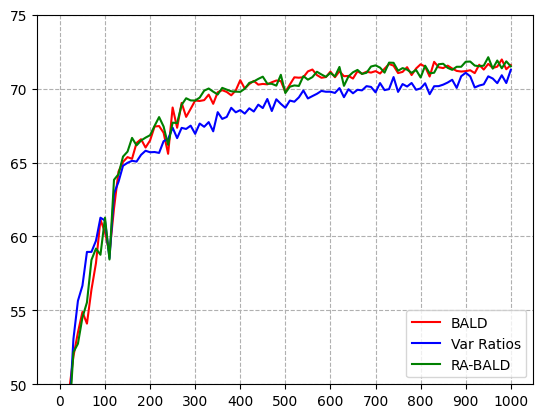

In [ ]:
data_dict = [
    {"data": b_data, "label": "BALD", "color": "red"},
    {"data": vr_data, "label": "Var Ratios", "color": "blue"},
    {"data": r_data, "label": "RA-BALD", "color": "green"},
]

plot_graph(data_dict, std=False)